In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#sdf = students data frame
sdf = pd.read_csv('HW2-Data.csv')
sdf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


# 1)

## a)

### The Null Hypothesis: The communities served by the two public schools in this dataset come from a simple random sample of the Portugal population.

### The Alternative Hypothesis: the communities served by the two public schools in this dataset DON'T come from a simple random sample of the Portugal population(not by chance).

## b)

### The test statistic is the number of females we can get if we sample 1044 students out of the population eligible to study in public schools with the probability for females being 51%.

# c)

### Let's find out the number of students in the dataset which will be the sample size & the number of female students in the dataset which will be our observed value. 

The total number of students in the dataset is: 1044
The total number of female students in the dataset is: 591
The percentage of female students in the dataset is: 0.5660919540229885


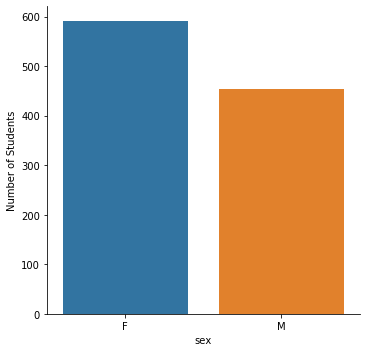

In [3]:
ax = sns.catplot(data = sdf, x='sex', kind='count')
ax.set(ylabel='Number of Students')
sdf_students_count=sdf['sex'].count()
ax.set(ylabel='Number of Students')
sdf_female_count=sdf['sex'][sdf['sex'] == 'F'].count()
sdf_female_percentage=(sdf['sex'][sdf['sex'] == 'F'].count())/(sdf['sex'].count())
print('The total number of students in the dataset is:',sdf_students_count)
print('The total number of female students in the dataset is:',sdf_female_count)
print('The percentage of female students in the dataset is:',sdf_female_percentage)

### Now I'll take a sample according to the probability given (51%) sized 1044 and count the number of females in the sample, I'll simulate this process 10000 times and each time store the female count in an array.
### Then I'll check the number of elements in the array that are equal or bigger than 591(observed value) and divide this number by the number of simulations. 
### The result that is recieved is the P-Value.

In [4]:
gender = ['female', 'male']
population_gender_prob = [0.51, 0.49] # probabilities of selection GIVEN THE MODEL IS TRUE
schools_size = 1044 #sample size

# sample one value
def sample_schools_students():
    sample_schools = np.random.choice(gender, p=population_gender_prob, size=schools_size)
    num_females = np.count_nonzero(sample_schools == 'female')
    return num_females

# run multiple simulations
num_repetitions = 10000
samples = np.empty(num_repetitions) # collection array
for i in range(num_repetitions):
    samples[i] = sample_schools_students()
    
samples

num_samples_with_591_or_more_females = np.count_nonzero(samples >= 591) #observed value = 591 
print ('The p-value is', num_samples_with_591_or_more_females/num_repetitions,'.')

The p-value is 0.0001 .


## d)

### The Null Hypothesis is wrong. The communities served by the two public schools in this dataset DON'T come from a simple random sample of the Portugal population(not by chance).
### The P-Value = 0.0001 received is lower than the required significance level = 0.01 which means I will reject the Null Hypothesis.


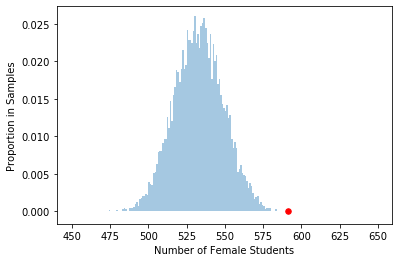

In [5]:
# plot the empirical distribution of the statistic
ax = sns.distplot(samples, kde=False, norm_hist=True, bins=np.arange(450,650,1))
ax.set(xlabel='Number of Female Students', ylabel='Proportion in Samples')

# Add a red point on the plot marking our data
plt.scatter(591, 0, marker='o', s=30, color='red')  # draw observed value
plt.show()

# 2)

## a)

###  The Null Hypothesis: The distribution of free time after school is uniform.
###  The Alternative Hypothesis:The distribution of free time after school is NOT uniform.

## b)

### The test statistic is the tvd(total variation distance) between the uniform probability for each freetime category or level (0.2 for each level) and the probabilty(distribution) of each freetime category we get after drawing a sample sized 1044(size of the dataset) according to the uniform distribution(0.2 for each category).

## c)

### I''ll use the tvd(total variation distance) method to calculate the observed value but first I'll will need to know the probability of each freetime category(level) in our dataset and then compare or input it in the tvd computing method/function with the uniform probability for freetime which is 0.2 for each category(level).

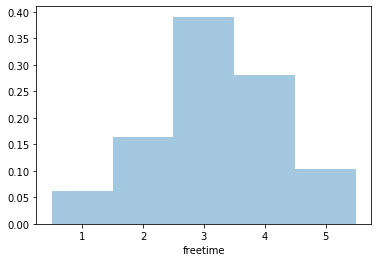

In [6]:
sns.distplot(sdf['freetime'], kde=False, norm_hist=True, bins=np.arange(0.5,6.5,1))

### The probability of each freetime category(level) in our dataset(1-5):

In [7]:
sdf_ft1_prob = (sdf['freetime'][sdf['freetime'] == 1].count())/(sdf['freetime'].count()) #ft1= freetime equals 1 #prob=probability 
sdf_ft2_prob = (sdf['freetime'][sdf['freetime'] == 2].count())/(sdf['freetime'].count())
sdf_ft3_prob = (sdf['freetime'][sdf['freetime'] == 3].count())/(sdf['freetime'].count())
sdf_ft4_prob = (sdf['freetime'][sdf['freetime'] == 4].count())/(sdf['freetime'].count())
sdf_ft5_prob = (sdf['freetime'][sdf['freetime'] == 5].count())/(sdf['freetime'].count())
print(sdf_ft1_prob, sdf_ft2_prob, sdf_ft3_prob, sdf_ft4_prob, sdf_ft5_prob)

0.06130268199233716 0.16379310344827586 0.39080459770114945 0.28065134099616856 0.10344827586206896


### Below I'll create a function that computes the tvd in our data which is our observed value. 

In [8]:
freetime_groups = ['ft1', 'ft2', 'ft3', 'ft4', 'ft5'] #ft=freetime #sdf=students data frame 
freetime_dist = [0.2, 0.2, 0.2, 0.2, 0.2] # uniform distribution
sdf_ft_dist = [sdf_ft1_prob, sdf_ft2_prob, sdf_ft3_prob, sdf_ft4_prob, sdf_ft5_prob] # distribution in sdf

# function for computing total variation distance
def compute_tvd(sample1_vals, sample2_vals):
    return (np.sum(np.absolute(sample1_vals-sample2_vals)))/2

tvd_sdf_ft = compute_tvd(np.array(freetime_dist),np.array(sdf_ft_dist)) #sdf=students data frame #ft=freetime
tvd_sdf_ft

0.271455938697318

### The observed value is 0.271455938697318.

### We can now simulate random free time levels samples of size 1044 (sample size = total number of students in sdf) based on a uniform distribution, and check the total variation distance between the values we get and the uniform distribution. Then, we can see whether a distance of 0.271455938697318 is reasonable given our model.

### First, let's write a code to simulate one value of the statistic, under the null:

In [9]:
# function for simulating one value of the statistic under the null
sdf_size = 1044 #we have 1044 students
def simulate_ft_dist_distance(): #ft_dist=freetime distribution
    # first, draw a simple random sample under the null
    sdf_ft_sample = np.random.choice(freetime_groups, p=freetime_dist, size=sdf_size)
    # second, count the number of elements of each group
    sdf_ft_sample_group_counts = []
    for group in freetime_groups:
        sdf_ft_sample_group_counts.append(np.count_nonzero(sdf_ft_sample == group))
    # third, get the proportions in the sample
    proportions_in_sample = np.divide(sdf_ft_sample_group_counts, sdf_size)
    # finally, get TVD between sample and uniform distribution
    distance = compute_tvd(np.array(freetime_dist), proportions_in_sample)
    return distance

simulate_ft_dist_distance()

0.017816091954022978

### Now, let's get an empirical distribution of the test statistic and calculate the P-Value:

In [10]:
#running multiple simulations
num_repetitions = 10000
many_tvds = np.empty(num_repetitions)
for i in range(num_repetitions):
    many_tvds[i] = simulate_ft_dist_distance()
    
many_tvds

num_samples_with_tvd_as_we_got_or_more = np.count_nonzero(many_tvds >= tvd_sdf_ft)
print ('The p-value is', num_samples_with_tvd_as_we_got_or_more/num_repetitions)

The p-value is 0.0


## d)

### The Null Hypothesis is wrong. The distribution of free time after school is NOT uniform.
### The P-Value = 0 received is lower than the required significance level = 0.05 which means I will reject the Null Hypothesis.

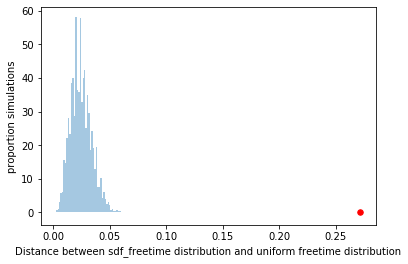

In [11]:
# visualizing the results
ax = sns.distplot(many_tvds, kde=False, norm_hist=True)
ax.set(xlabel='Distance between sdf_freetime distribution and uniform freetime distribution', ylabel='proportion simulations')
plt.scatter(tvd_sdf_ft, 0, color='red', s=30) # shows red dot where the value of the test statistic is
plt.show()

# 3)

## a)

### The Null Hypothesis : Students who drink a lot (4 or 5 Dalc) DON'T get different final grades in math courses than students who drink less (1–3 Dalc).(The difference is due to chance)
### The Alternative Hypothesis : Students who drink a lot (4 or 5 Dalc) get different final grades in math courses than students who drink less (1–3 Dalc).

## b)

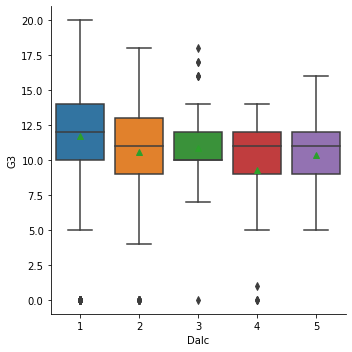

In [12]:
sns.catplot(data=sdf, x='Dalc', y='G3', kind='box', showmeans=True)

In [13]:
Dalc1_3_G3_Math_Mean = sdf['G3'][sdf['Dalc'] <= 3][sdf['class'] == 'Math'].mean()
Dalc4_5_G3_Math_Mean = sdf['G3'][sdf['Dalc'] > 3][sdf['class'] == 'Math'].mean()
print('The average Math final grade for 1<=Dalc<=3 is :',Dalc1_3_G3_Math_Mean)
print('The average Math final grade for 4<=Dalc<=5 is :',Dalc4_5_G3_Math_Mean)

The average Math final grade for 1<=Dalc<=3 is : 10.421750663129973
The average Math final grade for 4<=Dalc<=5 is : 10.277777777777779


In [14]:
observed_value = np.sum(Dalc1_3_G3_Math_Mean-Dalc4_5_G3_Math_Mean) #the difference in averages in absolute value
observed_value

0.14397288535219488

### Our observed value will be the difference in averages in absolute value which is  0.14397288535219488.

### I'm using absolute value because the question asked is "Do students who drink a lot (4 or 5 Dalc) get different final grades in math courses than students who drink less (1–3 Dalc)?". So I'm checking if the grades are different and not only if they're either lower or higher but both. So negative and postive are the same from my point of view(like distance).  

### Should we take 2 random samples of students(grades) the first with size 377 and the other sized 18 from the Math class & calculate the difference in means in absolute value between the 2 samples then the observed value is supposed to be consistent with the result we get according to the Null.

### Now I'll look for the sample sizes of our samples :

In [16]:
sizeDalc1_3 = sdf['G3'][sdf['Dalc'] <= 3][sdf['class'] == 'Math'].count()
sizeDalc1_3

377

In [17]:
sizeDalc4_5 = sdf['G3'][sdf['Dalc'] > 3][sdf['class'] == 'Math'].count()
sizeDalc4_5

18

### Below I'll create a function that returns the difference between sample means:

In [18]:
 # Note here, we need to sample WITHOUT REPLACEMENT, since the same student cannot be in the same sample more than once
def samples_mean_diff():
    random_Math_Students_sizeDalc1_3 = sdf[sdf['class']=='Math'].sample(n=sizeDalc1_3, replace=False)
    random_Math_Students_sizeDalc4_5 = sdf[sdf['class']=='Math'].sample(n=sizeDalc4_5, replace=False)
    mean_grade1 = random_Math_Students_sizeDalc1_3['G3'].mean()
    mean_grade2 = random_Math_Students_sizeDalc4_5['G3'].mean()
    return  np.sum(mean_grade1-mean_grade2)    

### Now I'll  simulate the function above 5000 times and check how many times the outcome of the function is bigger than the observed value and then divide that number by the number of simulations to get the P-Value.   

In [19]:
# run multiple simulations
num_sims = 5000 # number of simulations(repetitions)
many_mean_diffs = np.empty(num_sims) #an array that will contain all of the 5000 mean differences in absolute value
for i in range(num_sims):
    many_mean_diffs[i] = samples_mean_diff() 
    

# Computing the p-value
num_samples_equal_to_observed_value_we_got_or_bigger = np.count_nonzero(many_mean_diffs >= observed_value) 
print('The P-Value is', num_samples_equal_to_observed_value_we_got_or_bigger/num_sims)


The P-Value is 0.4328


## c)

### The Null Hypothesis is right.  Students who drink a lot (4 or 5 Dalc) DON'T get different final grades in math courses than students who drink less (1–3 Dalc).
### The P-Value = 0.4436 received is higher than the required significance level = 0.05 which means I will accept the Null Hypothesis.

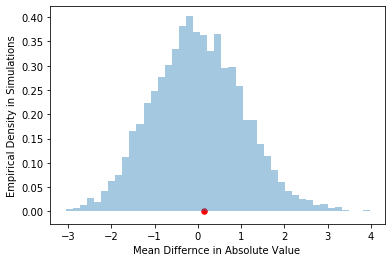

In [20]:
# visualizing the results
ax = sns.distplot(many_mean_diffs, kde=False, norm_hist=True)
ax.set(xlabel='Mean Differnce in Absolute Value ', ylabel='Empirical Density in Simulations')
plt.scatter(observed_value, 0, color='red', s=30) # shows red dot where the value of the test statistic is
plt.show()

# 4)

### The HW2-data is actually a sample, so the population parameter is actually unknown. I'll estimate a 95% condifence interval for the population median for a first period grade in Portuguese.

### First I'll calculate the median from our data(the original sample): 

In [170]:
portuguese_sample = sdf[sdf['class']=='Portuguese'] #the original sample
portuguese_sample['G1'].median()

11.0

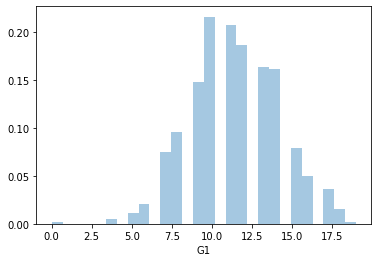

In [167]:
sns.distplot(portuguese_sample['G1'], kde=False, norm_hist=True)

### I'll define a function called bootstrap_median that takes our original sample, the name of the column containing the variable of interest, and the number of bootstrap samples we want to take, and returns an array of the corresponding resampled medians.
### Each time we resample and find the median, we replicate the bootstrap process. So the number of bootstrap samples will be called the number of replications.

### This is just a single estimate for the median of a first period grade in Portuguese in the population.I'll estimate this unknown (fixed) number using the Bootstrap method:



The 95% boostsrap confidence interval for population median is [11.0, 12.0]


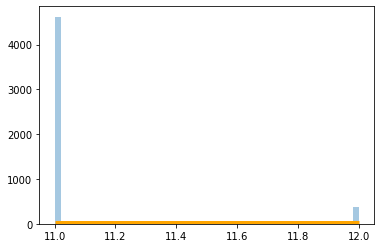

In [172]:
# This function returns an array of bootstrapped sample medians:
#     original_sample: df containing the original sample #portuguese_sample
#     column_name: name of column containing the variable of interest #G1 in this case
#     num_replications: number of bootstrap samples
def bootstrap_median(original_sample, column_name, num_replications):
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_var_of_interest = original_sample[[column_name]]
    bstrap_medians = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_var_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_median = bootstrap_sample.median()
        bstrap_medians[i] = resampled_median
    
    return bstrap_medians

# run the bootstrap procedure
medians_bootstrapped = bootstrap_median(portuguese_sample,'G1' , 5000)

# Get the endpoints of the 95% confidence interval
left_end = np.percentile(medians_bootstrapped, 2.5, interpolation='higher')
right_end = np.percentile(medians_bootstrapped, 97.5, interpolation='higher')
print('The 95% boostsrap confidence interval for population median is', [left_end,right_end])

# visualize results
ax = sns.distplot(medians_bootstrapped, kde=False)
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=7)  # lw controls thickness of line

### The 95% boostsrap confidence interval for the population median for a first period grade in Portuguese is 
### [11.0, 12.0] .

# 5)

### It's very problematic to bootstrap a very small sample because the idea of bootstrap is based on the law of averages, and according to it the smaller the original sample the smaller the chance that it's distribution will resemble the population, and the distributions of all the “resamples” are less likely to resemble the original sample. So the distributions of all the resamples are even way less likely to resemble the population. So using bootstrapping in such cases would be misleading. 

# 6)

### No, I would not trust these results and the reason behind that is simply that the sample isn't random because it was collected at the entrance of "Bet Hastudent" which is the same place where's Sushi located and thus to survey there is biased towards Sushi's favor in the rating (Nuna is located further away(Physics)). And in general if a sample is biased then bootstrap won't be helpful.